In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
import codecs
from subprocess import check_output
# plt.rcParams['figure.facecolor'] = 'lightgray'

In [19]:
__=pd.read_csv('../../terrorism_new.csv',encoding='ISO-8859-1')

In [20]:
terror=__
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['eventid','Year','Month','Day','Country','Region','city','latitude','longitude','success','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(3)

,eventid,Year,Month,Day,Country,Region,city,latitude,longitude,success,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,197000000002,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


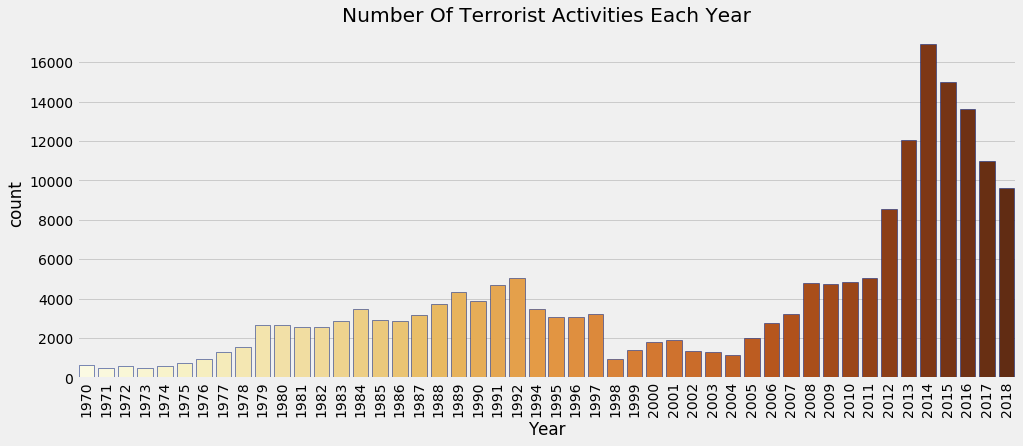

In [73]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='YlOrBr',edgecolor=sns.color_palette('dark',1))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

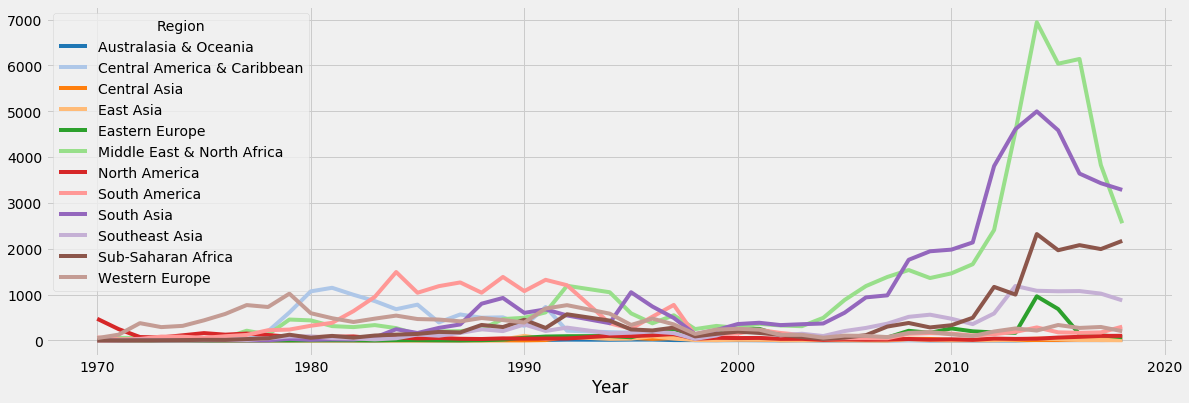

In [80]:
terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sns.color_palette('tab20', 12))
fig=plt.gcf()
fig.set_size_inches(18,6)

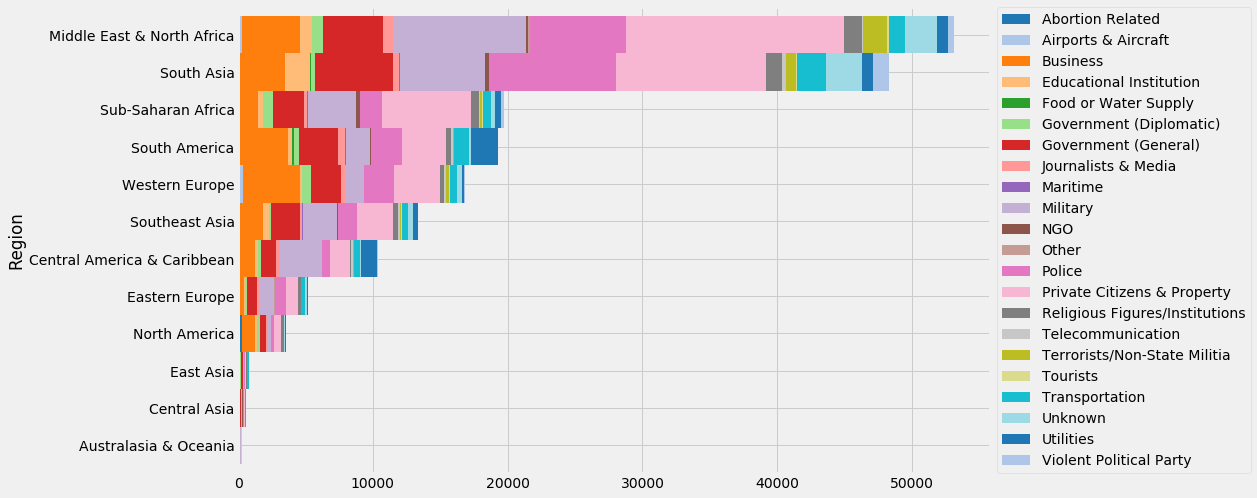

In [83]:
df1 = pd.crosstab(terror.Region,terror.Target_type)
df1 = df1.reindex(["Australasia & Oceania", "Central Asia","East Asia","North America", "Eastern Europe","Central America & Caribbean","Southeast Asia", "Western Europe","South America","Sub-Saharan Africa","South Asia","Middle East & North Africa"])
df1.plot.barh(stacked=True,width=1,color=sns.color_palette("tab20"))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Text(0.5, 1.0, 'Number of successful and failed attacks over the years')

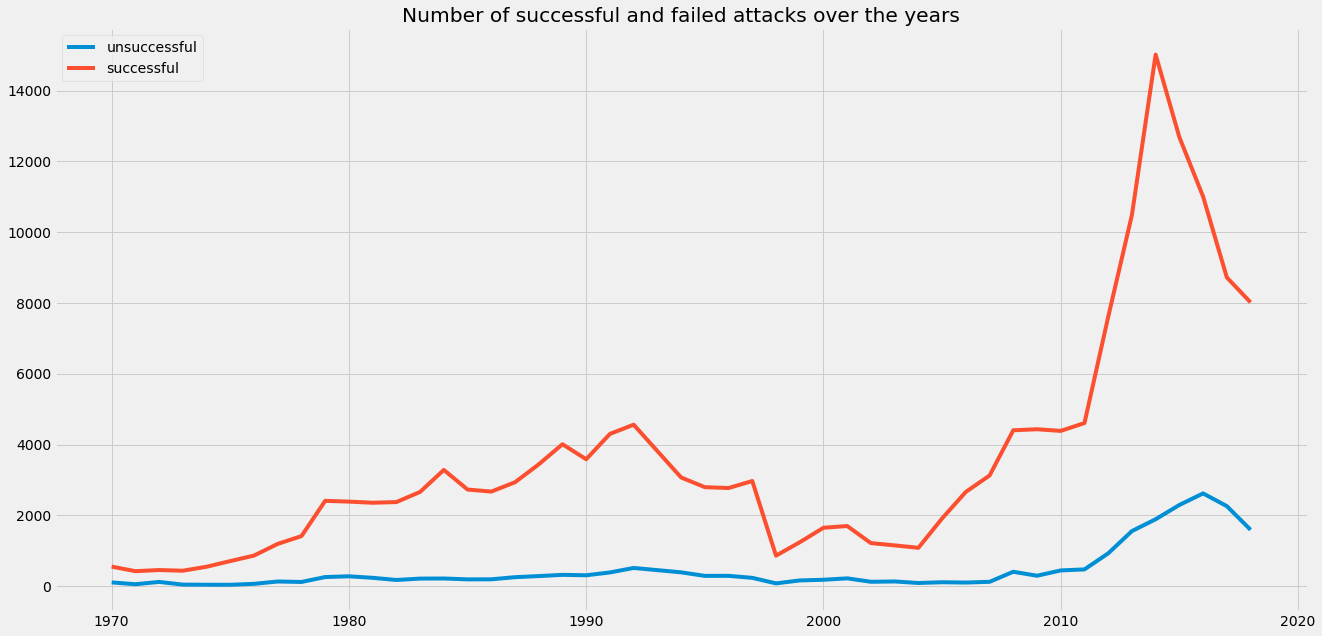

In [24]:
# number of successful vs failed attacks over the years
success_year_stats = terror.groupby(['Year','success'])['eventid'].count().to_frame().reset_index()
success_year_stats = success_year_stats.rename(columns={'eventid': 'count'})
plt.figure(figsize=(20,10))
for i in range(2):
    label = 'successful' if i == 1 else 'unsuccessful'
    df = success_year_stats[success_year_stats['success']==i]
    plt.plot(df['Year'], df['count'], label=label)
plt.legend()
plt.title('Number of successful and failed attacks over the years')

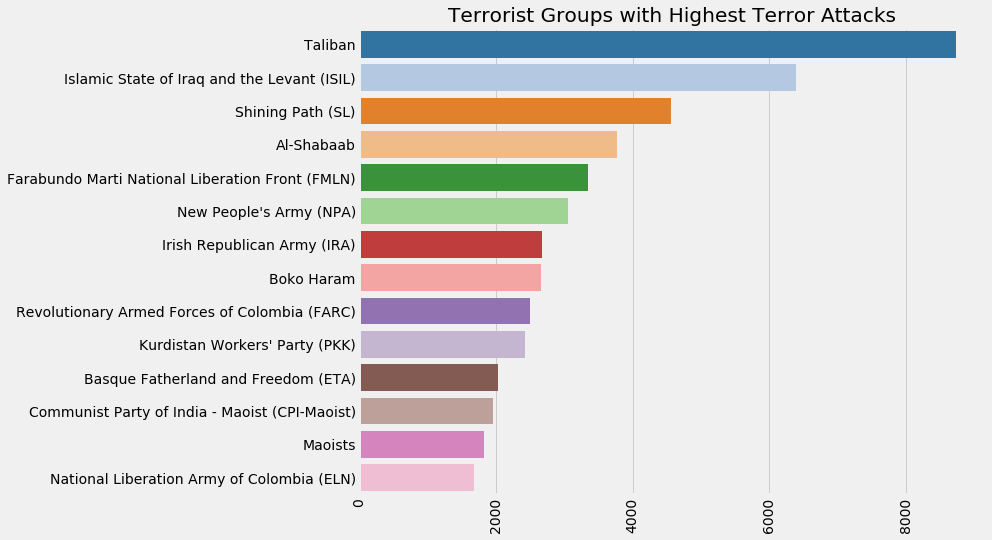

In [84]:
sns.barplot(terror['Group'].value_counts()[1:15].values,terror['Group'].value_counts()[1:15].index,palette=('tab20'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

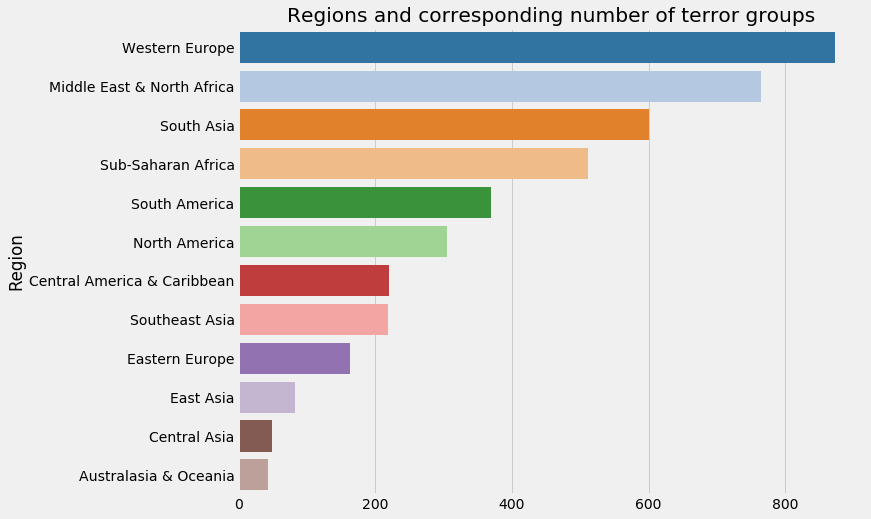

In [85]:
df = terror.groupby(['Region','Group']).count().reset_index()
s = df.groupby(["Region"])['Group'].count().sort_values(ascending=False)
sns.barplot(s.values,s.index,palette=('tab20'))
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Regions and corresponding number of terror groups')
plt.show()

In [59]:
terror["success"].value_counts()

1    169795
0     21669
Name: success, dtype: int64

In [60]:
21669/169795

0.12761859889867191